# Project Diabetes
##### Data from the hospital Frankfurt, Germany (source: Kaggle)

## 1. Import Libraries and Loading The Dataset

In [1]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #Machine learning
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #Machine learning
from sklearn.metrics import roc_auc_score,roc_curve #Machine learning

In [2]:
# Loading the diabetes dataset
df = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/diabetes/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## 2. Exploring the Dataset

#### Variables
<ul>
    <li>Pregnancies: Number of times pregnant</li>
    <li>Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test</li>
    <li>BloodPressure: Diastolic blood pressure(mm Hg)</li>
    <li>SkinThickness: Triceps skin fold thickness(mm)</li>
    <li>Insulin: 2-Hour serum insulin(mu U/ml)</li>
    <li>BMI: Body mass index (weight in kg/(height in m)^2)</li>
    <li>DiabetesPedigreeFunction: Diabetes pedigree function</li>
    <li>Age: Age (years)</li>
    <li>Outcome: Class variable (0 or 1)</li>
</ul>

#### Overview

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


#### Missings

In [5]:
# On first hand it doesn't look like there is missing data, but a bloodpressure or glucose level of zero can't be true. 
# So we have to replace the zeros for NaN in columns where zeros are not possible

In [6]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for x in columns:
    df[x].replace(0, np.NaN, inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   1987 non-null   float64
 2   BloodPressure             1910 non-null   float64
 3   SkinThickness             1427 non-null   float64
 4   Insulin                   1044 non-null   float64
 5   BMI                       1972 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


In [7]:
# Now we see we have a lot more missings
# Almost 50% of the Insulin data is missing. This is way too much
# So although we know insulin can be a big predictor of diabetes, we have to delete this column

In [8]:
dfcleaned = df.drop("Insulin", axis=1)
dfcleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,33.6,0.127,47,1
1,0,84.0,82.0,31.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,40.7,0.536,21,0


In [9]:
# We still have some 4 columns with missings. Let's have a look if there are rows with multiple missings. 
# If there are more than 2 missings we will also drop them

In [10]:
dfmiss = dfcleaned.loc[dfcleaned.isnull().sum(1)>2].index
dfmiss.shape

(19,)

In [11]:
dfcleaned = dfcleaned.drop(dfmiss, axis=0)

In [12]:
dfcleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1981 non-null   int64  
 1   Glucose                   1968 non-null   float64
 2   BloodPressure             1910 non-null   float64
 3   SkinThickness             1427 non-null   float64
 4   BMI                       1972 non-null   float64
 5   DiabetesPedigreeFunction  1981 non-null   float64
 6   Age                       1981 non-null   int64  
 7   Outcome                   1981 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 139.3 KB


In [13]:
# For the rest of the missings we will impute the mean
# Let's call the dataframe 'diabetes'.

In [14]:
diabetes = dfcleaned.fillna(dfcleaned.mean())
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1981 non-null   int64  
 1   Glucose                   1981 non-null   float64
 2   BloodPressure             1981 non-null   float64
 3   SkinThickness             1981 non-null   float64
 4   BMI                       1981 non-null   float64
 5   DiabetesPedigreeFunction  1981 non-null   float64
 6   Age                       1981 non-null   int64  
 7   Outcome                   1981 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 139.3 KB


## 3. Data Visualization

#### Histograms

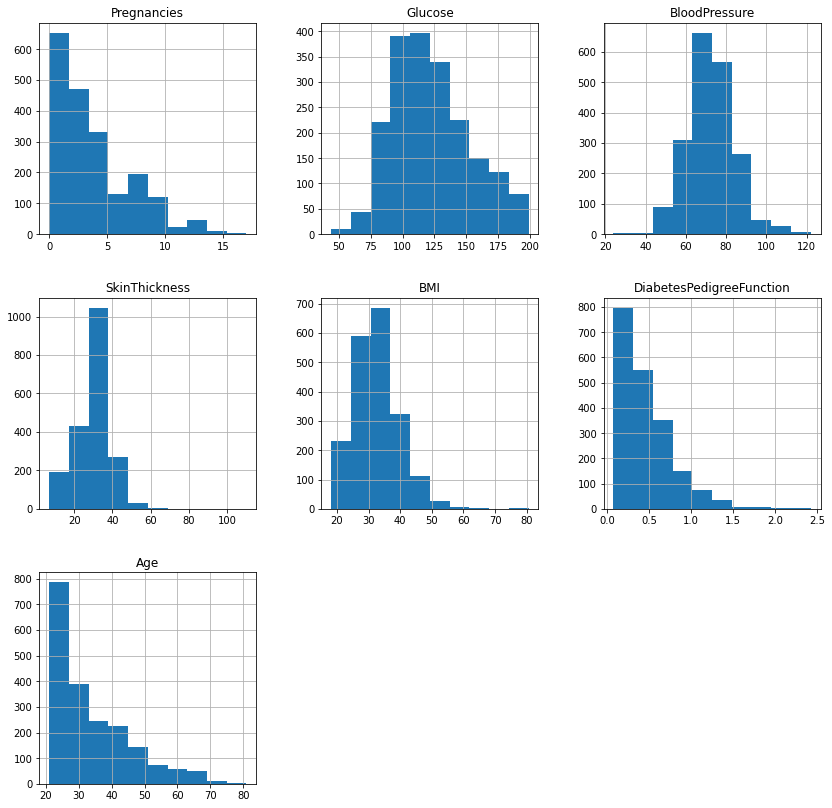

In [15]:
variables = diabetes.loc[:, diabetes.columns != 'Outcome']
variables.hist(figsize = (14, 14))
plt.show();

#### Density Plots

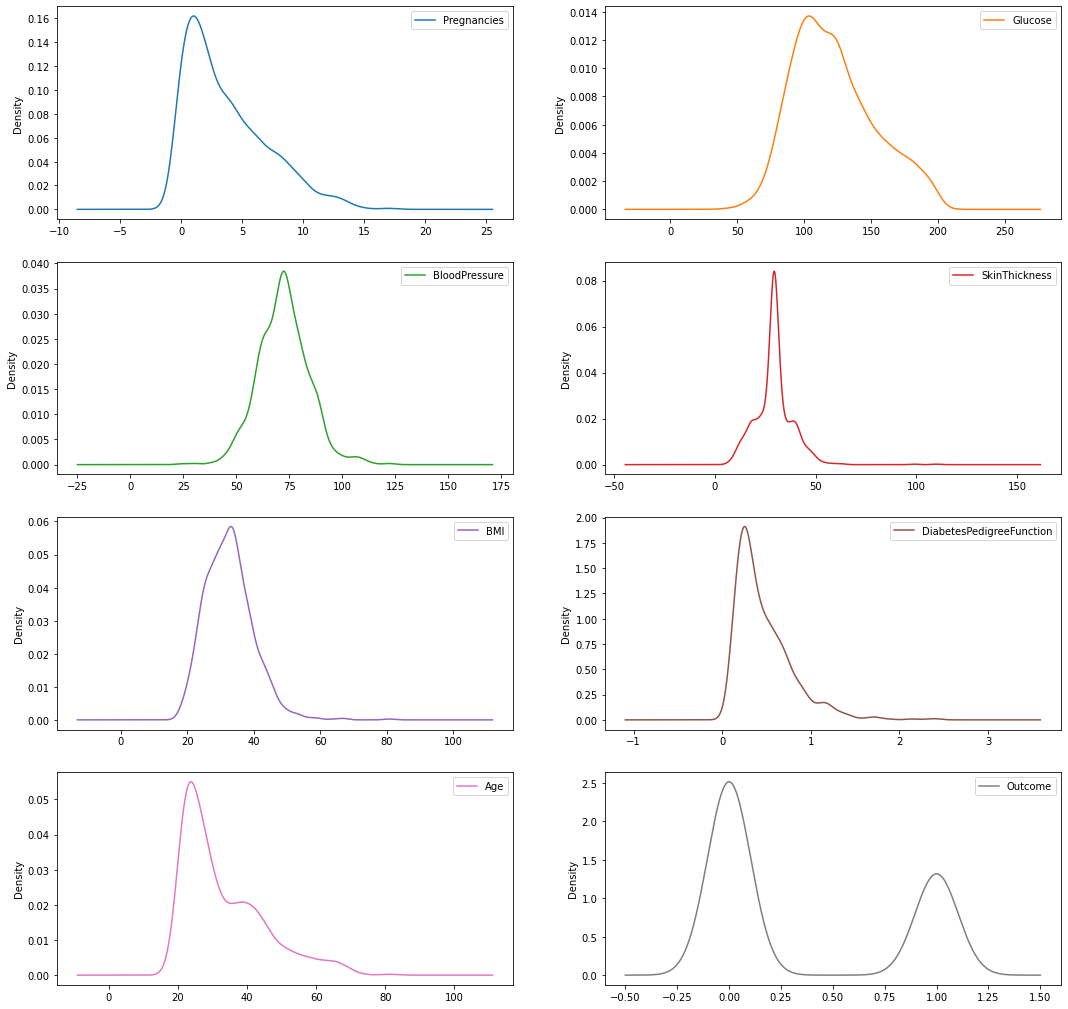

In [16]:
diabetes.plot(kind = 'density', subplots= True, layout = (4,2), sharex =False, figsize = (18, 18));

#### Heatmap

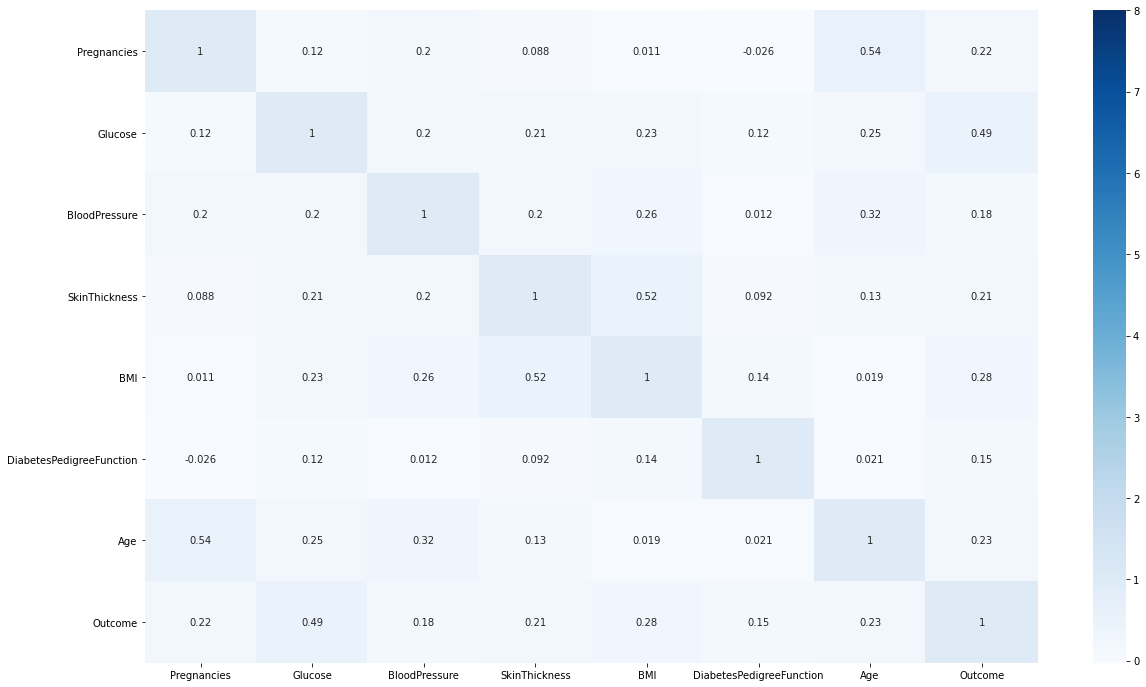

In [17]:
corr = diabetes.corr()
f, ax = plt.subplots(figsize = (20, 12))
sns.heatmap(corr, vmax = 8, annot = True, cmap="Blues");

## 4. Model Selection

### 4-1. Split the dataset

In [18]:
# "Outcome" is the target variable, so we first start by creating y (target) and X (predictor).

X = diabetes.drop(["Outcome"], axis = 1)
y = diabetes["Outcome"]

In [19]:
# Creating a test and training set with a test size of 20 percent. 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

# Now we will test different models

### 4-2-1. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = randomforest_model.predict(X_test)
print("Random Forest Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(randomforest_model, X_test, y_test, cv = 5).mean()))


Random Forest Accuracy Score = 0.9848866498740554
Cross validation score = 0.7880696202531645


In [21]:
# This is a really high Accuracy Score. Let's look at the details

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       256
           1       0.97      0.99      0.98       141

    accuracy                           0.98       397
   macro avg       0.98      0.99      0.98       397
weighted avg       0.98      0.98      0.98       397



In [22]:
# It looks like the model is performing good at predicting both true positives and true negatives.
# Let's use Gridsearch to see if we can improve te model by adjusting the parameters

### 4-2-2. Random Forest Hyperparameter Optimization

In [23]:
# First create a GridsearchCV

grid_dict = {"max_depth": [3,5,7],
            "max_features": [3,5,7],
            "n_estimators": [10, 100, 250, 500, 1000],
            "min_samples_split": [2,5,10]}

# Fit the model
rf_model_grid = GridSearchCV(RandomForestClassifier(), 
                           grid_dict, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2) 

rf_model_grid.fit(X_train, y_train)

# Print the best parameters
print("Best Params: " + str(rf_model_grid.best_params_))

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  4.4min finished


Best Params: {'max_depth': 7, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 1000}


In [24]:
# Now we will use the best parameters and see if our accuracy has improved...

rf_best_param = RandomForestClassifier(max_depth = 7, 
                                  max_features = 7, 
                                  min_samples_split = 2,
                                  n_estimators = 500)

rf_best_param.fit(X_train, y_train)
y_pred = randomforest_model.predict(X_test)
print("Random Forest Tuned Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(rf_best_param, X_test, y_test, cv = 5).mean()))
print(classification_report(y_test, y_pred))

Random Forest Tuned Accuracy Score = 0.9848866498740554
Cross validation score = 0.755253164556962
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       256
           1       0.97      0.99      0.98       141

    accuracy                           0.98       397
   macro avg       0.98      0.99      0.98       397
weighted avg       0.98      0.98      0.98       397



In [25]:
# We see the model didn't improve but stayed the same. That's OK, because the f1 score was really high (0.98)

### 4-3-1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(log_model, X_test, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy Score = 0.7304785894206549
Cross validation score = 0.7325949367088607

              precision    recall  f1-score   support

           0       0.75      0.86      0.81       256
           1       0.66      0.49      0.56       141

    accuracy                           0.73       397
   macro avg       0.71      0.68      0.68       397
weighted avg       0.72      0.73      0.72       397



### 4-3-2. Logistic Regression Hyperparameter Optimization

In [27]:
# Create GridsearchCV and fit the model


log_grid_dict={"C":np.logspace(-4,4,20), 
                "penalty":["l1","l2", "elasticnet", "none"], 
                "max_iter":[100, 1000, 2500, 5000],
                "solver":['liblinear', 'saga']}

logreg_grid=GridSearchCV(LogisticRegression(), log_grid_dict, cv=5, n_jobs=-1, verbose=True)

logreg_grid.fit(X_train,y_train)

# Print the best parameters

print("Best Params: " + str(logreg_grid.best_params_))

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 862 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2210 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3008 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3185 out of 3200 | elapsed:  3.1min remaining:    0.8s


Best Params: {'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:  3.2min finished


In [28]:
# We see that 'C' has a different value. The rest have the default value we already used before. 
# Now we will use the best parameters

log_best_param = LogisticRegression(solver = "liblinear", C=1.623776739188721).fit(X_train,y_train)
y_pred = log_best_param.predict(X_test)
print("Logistic Regression Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(log_best_param, X_test, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))



Logistic Regression Accuracy Score = 0.7355163727959698
Cross validation score = 0.7375316455696203

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       256
           1       0.67      0.50      0.57       141

    accuracy                           0.74       397
   macro avg       0.71      0.68      0.69       397
weighted avg       0.73      0.74      0.73       397



In [29]:
# We see that the model has improved, but the improvement is small.

### 4-4-1. k-Nearest Neighbor

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("k-Nearest Neighbor Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(knn_model, X_test, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))

k-Nearest Neighbor Accuracy Score = 0.7581863979848866
Cross validation score = 0.7151582278481012

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       256
           1       0.70      0.57      0.62       141

    accuracy                           0.76       397
   macro avg       0.74      0.72      0.72       397
weighted avg       0.75      0.76      0.75       397



### 4-4-2. k-Nearest Neighbor Hyperparameter Optimization

In [31]:
# Now we will make a GridsearchCV for kNN and fit the model 

knn_grid_dict = {"leaf_size":list(range(1,50)), 
                "n_neighbors":list(range(1,30)), 
                "p":[1,2],
                "weights":['uniform', 'distance'],
                }

knn_grid=GridSearchCV(KNeighborsClassifier(), knn_grid_dict, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train,y_train)

# Print the best parameters
print("Best Params: " + str(knn_grid.best_params_))


Fitting 5 folds for each of 5684 candidates, totalling 28420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 4856 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 7056 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 9656 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 12656 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 16056 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 19856 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 24056 tasks      | elapsed:  2.9min


Best Params: {'leaf_size': 1, 'n_neighbors': 16, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 28420 out of 28420 | elapsed:  3.4min finished


In [32]:
# Now we will use these parameters to improve the model

knn_best_param = KNeighborsClassifier(leaf_size=1, n_neighbors = 16, p = 1, weights='distance').fit(X_train, y_train)
y_pred = knn_best_param.predict(X_test)
print("k-Nearest Neighbor Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(knn_best_param, X_test, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))

k-Nearest Neighbor Accuracy Score = 0.9773299748110831
Cross validation score = 0.7553164556962025

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       256
           1       0.97      0.96      0.97       141

    accuracy                           0.98       397
   macro avg       0.98      0.97      0.98       397
weighted avg       0.98      0.98      0.98       397



In [33]:
# We see we have a big improvement in our model. The f1-score has gone from 0.76 to 0.98!

### 4-5-1. Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB().fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(nb_model, X_test, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy Score = 0.7405541561712846
Cross validation score = 0.7276265822784811

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       256
           1       0.65      0.58      0.61       141

    accuracy                           0.74       397
   macro avg       0.72      0.70      0.71       397
weighted avg       0.74      0.74      0.74       397



### 4-5-2. Naive Bayes Hyperparameter Optimization

In [35]:
# Now we will make a GridsearchCV for NB and fit the model, altough GaussianNB hasn't got much parameters to tune.

nb_grid_dict = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_grid=GridSearchCV(GaussianNB(), nb_grid_dict, cv=5, n_jobs=-1, verbose=True)

nb_grid.fit(X_train,y_train)

# Print the best parameters
print("Best Params: " + str(nb_grid.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Best Params: {'var_smoothing': 0.012328467394420659}


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished


In [36]:
# Now we will use the parameter to improve the model

nb_best_param = GaussianNB(var_smoothing=0.012328467394420659).fit(X_train, y_train)
y_pred = nb_best_param.predict(X_test)
print("Naive Bayes Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(nb_best_param, X_test, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy Score = 0.7481108312342569
Cross validation score = 0.7401898734177215

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       256
           1       0.68      0.56      0.61       141

    accuracy                           0.75       397
   macro avg       0.73      0.71      0.71       397
weighted avg       0.74      0.75      0.74       397



In [37]:
# The f1-score has slightly improved with 0.01.

### 4-6-1. Gradient Boosting Model

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
print("Gradient Boosting Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(gbm_model, X_test, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))

Gradient Boosting Accuracy Score = 0.8312342569269522
Cross validation score = 0.7603481012658228

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       256
           1       0.81      0.69      0.74       141

    accuracy                           0.83       397
   macro avg       0.82      0.80      0.81       397
weighted avg       0.83      0.83      0.83       397



### 4-6-2 Gradient Boosting Model Hyperparameter Optimization

In [39]:
# Now we will make a GridsearchCV for Gradient Boosting and fit the model.

gbm_grid_dict = {'learning_rate':[0.01, 0.05, 0.1, 0.5, 1], 
                  'min_samples_split':[2,5,10,20], 
                  'max_depth':[2,3,5,10]}

gbm_grid=GridSearchCV(GradientBoostingClassifier(), gbm_grid_dict, cv=5, n_jobs=-1, verbose=True)

gbm_grid.fit(X_train,y_train)

# Print the best parameters
print("Best Params: " + str(gbm_grid.best_params_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   58.7s finished


Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 20}


In [40]:
# Now we will use the parameter to improve the model

gbm_best_param = GradientBoostingClassifier(learning_rate=0.1, max_depth=10, min_samples_split=20).fit(X_train, y_train)
y_pred = gbm_best_param.predict(X_test)
print("Gradient Boosting Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(gbm_best_param, X_test, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))

Gradient Boosting Accuracy Score = 0.9596977329974811
Cross validation score = 0.7603164556962024

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       256
           1       0.93      0.96      0.94       141

    accuracy                           0.96       397
   macro avg       0.95      0.96      0.96       397
weighted avg       0.96      0.96      0.96       397



In [41]:
# We see that tuning the parameters improved the model with an f1-score of 0.96!

### 4-7-1. Support Vector Machine Model

In [42]:
from sklearn.svm import SVC

svm_model = SVC(kernel = "linear").fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Support Vector Machine Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(svm_model, X_test, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))

Support Vector Machine Accuracy Score = 0.7229219143576826
Cross validation score = 0.7401582278481013

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       256
           1       0.65      0.48      0.55       141

    accuracy                           0.72       397
   macro avg       0.70      0.67      0.67       397
weighted avg       0.71      0.72      0.71       397



### 4-7-2. Support Vector Machine Model Hyperparameter Optimization

In [43]:
# Now we will make a GridsearchCV for Support Vector Machine and fit the model.
# We can't try too much different parameters, because with a SVM model this will take a lot of time.

svm_grid_dict = {'C': [0.1, 1], 
                 'gamma': [1,0.1],
                 'kernel': ['linear', 'rbf']}

svm_grid=GridSearchCV(SVC(), svm_grid_dict, cv=5, n_jobs=-1, verbose=True)

svm_grid.fit(X_train,y_train)

# Print the best parameters
print("Best Params: " + str(svm_grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   12.0s finished


Best Params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [44]:
# Now we will use the parameter to improve the model

svm_best_param = SVC(C = 1, gamma = 1, kernel = 'rbf').fit(X_train, y_train)
y_pred = svm_best_param.predict(X_test)
print("Support Vector Machine Model Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(svm_best_param, X_test, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))

Support Vector Machine Model Accuracy Score = 0.982367758186398
Cross validation score = 0.7456012658227849

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       256
           1       1.00      0.95      0.97       141

    accuracy                           0.98       397
   macro avg       0.99      0.98      0.98       397
weighted avg       0.98      0.98      0.98       397



In [45]:
# Our f1-score went from 0.72 to 0.98, which is a big improvement!

###  5. Conslusion

##### After we have tested and tried to improve all models we can come to the following conclusion

<ul>
    <li>There a 3 models with a f1-score of 0.98 (Random Forest, kNN and SVM)</li>
    <li>Since the Random Forest model has a slightly better score in predicting true positives, this model is the best option </li>
    <li>For further improvements we can try to scale the data first</li>
    <li>What also can influence the outcomes is the difference in numbers of patients with and without the disease</li>
    <li>We also deleted the predictor 'Insulin', because there were too much missings. More complete data would improve the model.</li>

</ul>